In [1]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize
from scipy.io import loadmat
%matplotlib inline

In [2]:
data = loadmat('ex5data1.mat')
X, y = data['X'],data['y']
Xtest,ytest = data['Xtest'],data['ytest']
Xval,yval = data['Xval'],data['yval']
m = y.size

Text(0, 0.5, 'Water flowing out of the dam (y)')

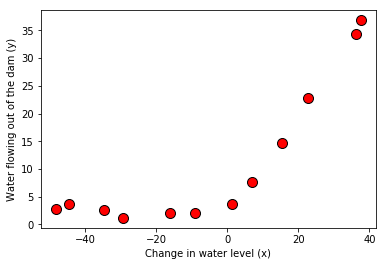

In [3]:
pyplot.plot(X,y,'ro',ms=10,mec='k',mew=1)
pyplot.xlabel('Change in water level (x)')
pyplot.ylabel('Water flowing out of the dam (y)')

In [4]:
def linearRegCostFunction(X,y,theta,lambda_=0.0):
    m = y.size
    J = 0

    grad = np.zeros((2,1))
    theta=theta.reshape(2,1)
    X = np.concatenate([np.ones(X.shape),X],axis=1)    
    prediction = X.dot(theta)

    temp = theta
    temp[0] = 0
    J = 1.0/(2.0*m)*(np.sum((prediction-y)**2))+lambda_/(2.0*m)*(np.sum(temp**2))
    
    grad = 1.0/m*X.T.dot(prediction-y)+lambda_/m*temp
    
    return J, grad

In [5]:
theta = np.ones(2)
J, grad = linearRegCostFunction(X,y,theta,0)
J, grad

(303.9515255535976, array([[-15.30301567],
        [598.16741084]]))

In [6]:
b=np.concatenate([np.ones(X.shape),X],axis=1)
a=np.ones((2,1))
c=b.dot(a)
c[0]=0
c

array([[  0.        ],
       [-28.15297922],
       [ 37.18954863],
       [ 38.49218733],
       [-47.05882945],
       [ -7.94145794],
       [ 16.30779289],
       [-33.70626581],
       [  2.38915437],
       [-43.38375985],
       [  8.01350208],
       [ 23.76274892]])

In [7]:
def trainLinearReg(objfunc, X, y, lambda_=0, maxiter = 200):
    itheta=np.ones(2)
    costgradF = lambda t : objfunc(X,y,t,lambda_)
    res = optimize.minimize(costgradF,itheta,jac=True,method='tnc',options={'maxiter':maxiter})
    
    return res.x

In [8]:
theta = trainLinearReg(linearRegCostFunction,X,y,lambda_=0,maxiter=200)
theta

array([0.        , 0.30304721])

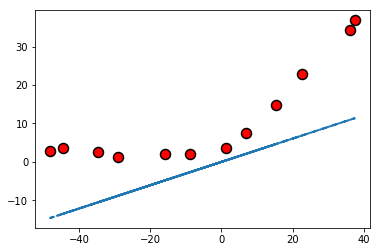

In [9]:
pyplot.plot(X,y,'ro',ms=10,mec='k',mew=1.5)
pyplot.plot(X,np.dot(np.concatenate([np.ones((12,1)),X],axis=1),theta),'--',lw=2)

In [10]:
def LearinngCurve(X, y , Xval, yval, lambda_=0):
    m = y.size
    error_train = np.zeros(m)
    error_val = np.zeros(m)
    X=np.concatenate([np.ones((m,1)),X], axis=1)
    
    for i in range(m):
        temp1=X[:(i+1),:]
        temp2=y[:(i+1),:]
        theta=trainLinearReg(linearRegCostFunction,temp1,temp2,lambda_=0,maxiter=200)
        Jt, gradt = linearRegCostFunction(temp1,temp2,theta,lambda_=0)
        Jv, gradv = linearRegCostFunction(Xval,yval,theta,lambda_=0)
        error_train[i]=Jt
        error_val[i]=Jv
        
    
    
    return error_train, error_val

In [11]:
error_train, error_val = LearinngCurve(X,y,Xval,yval,lambda_=0)
pyplot.plot(np.arange(1,m+1), error_train,np.arange(1,m+1),error_val, lw=2)


ValueError: shapes (1,4) and (2,1) not aligned: 4 (dim 1) != 2 (dim 0)

In [41]:
def polyFeatures(X,p):
    X_poly = np.zeros((X.shape[0],p))
    
    for i in range(p):
        X_poly[:,i] = X**(i+1)
    
    return X_poly

In [42]:
def featureNormalize(X):
    return (X-np.mean(X))/

SyntaxError: invalid syntax (<ipython-input-42-dd02339a29b9>, line 2)

In [43]:
p=8
X_poly=polyFeatures(X,p)


AttributeError: 'int' object has no attribute 'T'

In [40]:
d=np.concatenate([X, X**2],axis =1)


array([[-1.59367581e+01,  2.53980260e+02],
       [-2.91529792e+01,  8.49896197e+02],
       [ 3.61895486e+01,  1.30968343e+03],
       [ 3.74921873e+01,  1.40566411e+03],
       [-4.80588295e+01,  2.30965109e+03],
       [-8.94145794e+00,  7.99496701e+01],
       [ 1.53077929e+01,  2.34328523e+02],
       [-3.47062658e+01,  1.20452489e+03],
       [ 1.38915437e+00,  1.92974986e+00],
       [-4.43837599e+01,  1.96991814e+03],
       [ 7.01350208e+00,  4.91892115e+01],
       [ 2.27627489e+01,  5.18142738e+02]])